In [70]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline

In [3]:
df = pd.read_csv('parsed/featurized_sample.csv')

In [6]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1, inplace=True)

In [8]:
np.sum(df.sqft.isnull())

9472

In [9]:
df.head(50)

,id,heading,body,price,lat,long,region,neighborhood,beds,baths,parking,sqft,apt,accuracy,date,flagged,house,comp_median_price,comps_found
0,2268304346,Fabulous 7th floor bay view apt - In unit w/d ...,\n San Francisco - Pacific Heights - Apartment...,7700,37.792889,-122.431263,sfc,NaN,3,3,0,NaN,1,8,2015-06-17 21:07:31,NaN,NaN,7700.0,10
1,2268305136,Sunny Top Floor Castro Unit - JGPM,\n Sunny Top Floor Castro Unit - JGPM\n Proper...,2395,37.774930,-122.419420,sfc,NaN,1,1,0,NaN,1,6,2015-06-17 21:04:13,NaN,NaN,2638.5,10
2,2268308559,Experience Studio Living and Flexible Lease Te...,\n Tower 737 CALL US TODAY!\nx551 Want more in...,2522,37.787301,-122.414174,sfc,NaN,0,1,0,NaN,1,8,2015-06-17 20:12:58,NaN,NaN,2522.0,10
3,2268318906,Studios with Amazing Bay and Bridge Views,\n The Gateway Apartments &amp; Townhomes\nCAL...,3097,37.796771,-122.398200,sfc,NaN,0,1,0,NaN,1,8,2015-06-17 21:03:47,NaN,NaN,3044.5,10
4,2268323349,Beautiful Remodeled San Francisco Flat - JGPM,\n Beautiful Remodeled San Francisco Flat - JG...,6000,37.786894,-122.440009,sfc,NaN,3,2,0,NaN,NaN,8,2015-06-17 21:23:47,NaN,NaN,5547.5,10
5,2268324853,Furnished 2BR/2BA Luxury Condo at the Infinity...,\n The Infinity\nAddress: 338 Spear Street\nDi...,1500,37.789592,-122.390373,sfc,NaN,2,2,0,NaN,NaN,8,2015-06-17 21:26:45,NaN,NaN,5725.0,10
6,2268341080,Efficiency unit with Shared Bathrooms,\n Newly Renovated Efficiency with own Kitchen...,2000,37.768537,-122.415614,sfc,NaN,0,NaN,1,NaN,1,8,2015-06-17 21:35:21,NaN,NaN,2250.0,10
7,2268352285,WALK TO BART - OPEN Sunday 2 - 4,\n Looking to live within walking distance to ...,6100,37.710213,-122.469285,sfc,NaN,3,2,4,NaN,NaN,8,2015-06-17 21:49:12,NaN,1,3165.0,10
8,2268391869,Cole Valley gorgeous and spacious two bedrooms...,"\n Located in Cole Valley, this architect-remo...",4950,37.765389,-122.454622,sfc,NaN,2,1,1,NaN,1,8,2015-06-17 22:28:29,NaN,NaN,3637.5,10
9,2268418637,Jasper preleasing NOW VIP prices Heck of a p...,\n Jasper\nhttp://rentjasper.prospectportal.co...,6570,37.786400,-122.389200,sfc,NaN,2,2,0,NaN,1,8,2015-06-17 22:47:11,NaN,NaN,6050.0,10


In [11]:
X = df.drop(['id', 'heading', 'body','lat','long', 'region','neighborhood','sqft', 'accuracy','date','flagged','comps_found'], axis=1)

In [14]:
X['apt'].fillna(0, inplace=True)
X['house'].fillna(0, inplace=True)

In [34]:
# fill bath nulls
# assume 
print np.sum(X[X.beds==0].baths.isnull())
print np.sum(X[X.beds==1].baths.isnull())
print np.sum(X[X.beds==2].baths.isnull())
print np.sum(X[X.beds==3].baths.isnull())
print np.sum(X[X.beds==4].baths.isnull())
print np.sum(X[X.beds==5].baths.isnull())
print np.sum(X[X.beds==6].baths.isnull())
print np.sum(X[X.beds==7].baths.isnull())
print np.sum(X[X.beds==8].baths.isnull())

706
278
138
40
7
0
0
0
0


In [35]:
X[X.beds==0].baths.fillna(1, inplace=True)
X[X.beds==1].baths.fillna(1, inplace=True)
X[X.beds==2].baths.fillna(1, inplace=True)
X[X.beds==3].baths.fillna(2, inplace=True)
X[X.beds==4].baths.fillna(2, inplace=True)

In [37]:
np.sum(X.baths.isnull())

1169

In [41]:
bath_dict = {0: 1, 1: 1, 2: 1, 3: 2, 4: 2}

In [50]:
nulls_df = X[X.baths.isnull()]

In [51]:
nulls_df['baths'] = nulls_df['beds'].map(lambda beds: bath_dict[beds])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [52]:
X['baths'].fillna(value=nulls_df['baths'], inplace=True)

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18794 entries, 0 to 18793
Data columns (total 7 columns):
price                18794 non-null float64
beds                 18794 non-null float64
baths                18794 non-null float64
parking              18794 non-null int64
apt                  18794 non-null float64
house                18794 non-null float64
comp_median_price    18794 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.1 MB


In [54]:
y = X['price']

In [55]:
X = X.drop('price', axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [59]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           random_state=1)

In [60]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [63]:
rf.feature_importances_

array([ 0.03190688,  0.03478849,  0.04627505,  0.01926578,  0.01308916,
        0.85467465])

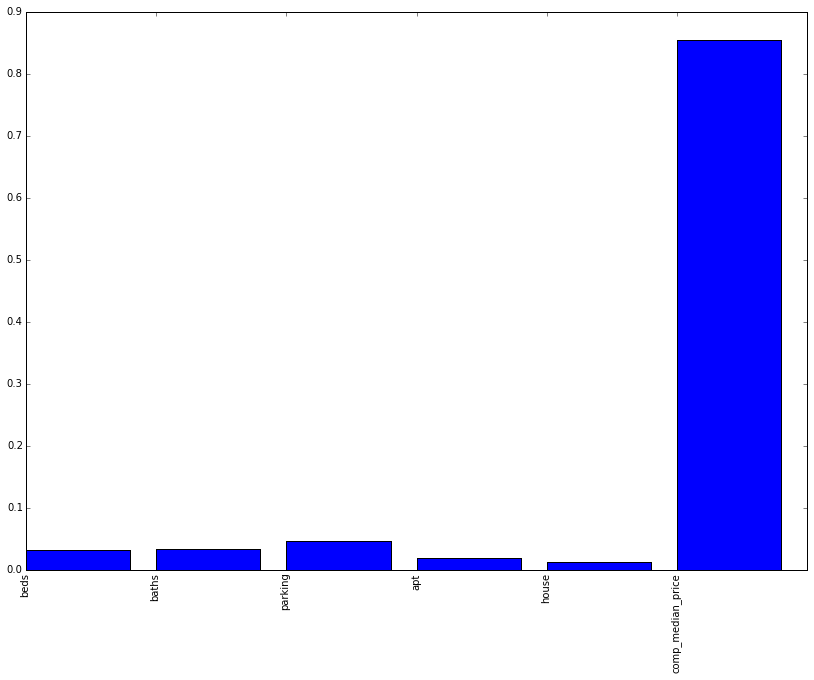

In [64]:
x = range(len(rf.feature_importances_))
plt.figure(figsize=(14,10))
plt.bar(x, rf.feature_importances_)
plt.xticks(x, X.columns, rotation=90)
plt.show()

In [66]:
y_pred = rf.predict(X_test)

In [67]:
print mean_squared_error(y_test, y_pred)
print mean_absolute_error(y_test, y_pred)

824609.959237
568.78298388


In [68]:
X_test

,beds,baths,parking,apt,house,comp_median_price
18197,1,1,0,1,0,2525.0
4940,1,1,4,0,0,3540.0
13653,0,1,0,1,0,1400.0
4806,2,1,3,1,0,3932.0
4930,1,1,1,1,0,2924.0
7040,0,1,1,0,0,2772.5
2789,0,1,4,1,0,2970.5
3464,2,2,0,1,0,4549.5
10528,2,2,4,1,0,4725.0
17371,2,1,4,1,0,3115.0


In [69]:
X

,beds,baths,parking,apt,house,comp_median_price
0,3,3,0,1,0,7700.0
1,1,1,0,1,0,2638.5
2,0,1,0,1,0,2522.0
3,0,1,0,1,0,3044.5
4,3,2,0,0,0,5547.5
5,2,2,0,0,0,5725.0
6,0,1,1,1,0,2250.0
7,3,2,4,0,1,3165.0
8,2,1,1,1,0,3637.5
9,2,2,0,1,0,6050.0


In [71]:
def fit_score_model(X_train, X_test, y_train, y_test, model):
	'''

	'''
	model.fit(X_train.values, y_train.values)
	y_pred = model.predict(X_test.values)

	mse = mean_squared_error(y_test.values, y_pred)
	mae = mean_absolute_error(y_test.values, y_pred)

	return mse, mae

In [72]:
	rf = RandomForestRegressor(n_estimators=100)
	lr = LinearRegression()
	gdbr = GradientBoostingRegressor()
	ada = AdaBoostRegressor()

	models = [rf, lr, gdbr, ada]

In [73]:
for model in models:
    mse, mae = fit_score_model(X_train, X_test, y_train, y_test, model)
    print model.__class__.__name__
    print "MSE: ", mse
    print "MAE: ", mae
    print '-' * 30

RandomForestRegressor
MSE:  818643.613995
MAE:  567.200672411
------------------------------
LinearRegression
MSE:  782196.147632
MAE:  553.767169562
------------------------------
GradientBoostingRegressor
MSE:  766018.719347
MAE:  542.591098195
------------------------------
AdaBoostRegressor
MSE:  1038029.94615
MAE:  724.835986774
------------------------------


In [74]:
lr.coef_

array([ -65.34616917,  496.01229592,   43.378931  , -194.7523922 ,
       -175.87558284,    0.85035903])

In [75]:
lr.intercept_

85.885187119211878